In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_insurance = pd.read_csv("insurance.csv")

In [ ]:
df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Data clean

In [ ]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df_insurance.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [ ]:
df_insurance.drop_duplicates(inplace = True)

In [ ]:
df_insurance = df_insurance.reset_index(drop=True)

In [ ]:
num_cols = [col for col in df_insurance.columns if (df_insurance[col].dtype in ["int64","float64"]) & (df_insurance[col].nunique()>40)]
num_cols.pop()
num_cols

['age', 'bmi']

In [ ]:
cat_cols = [col for col in df_insurance.columns if df_insurance[col].nunique()<6]
cat_cols

['sex', 'smoker', 'region']

### EDA

In [ ]:
df_insurance["charges"].quantile([0,0.25,0.50, 0.75,1])

0.00     1121.87390
0.25     4746.34400
0.50     9386.16130
0.75    16657.71745
1.00    63770.42801
Name: charges, dtype: float64

In [ ]:
df_insurance["charges_segments"] = pd.cut(df_insurance["charges"],
                                 bins=[0,5000,15000,30000,np.inf],
                                 labels=["D","C","B","A"],
                                include_lowest=True)

### Numerical

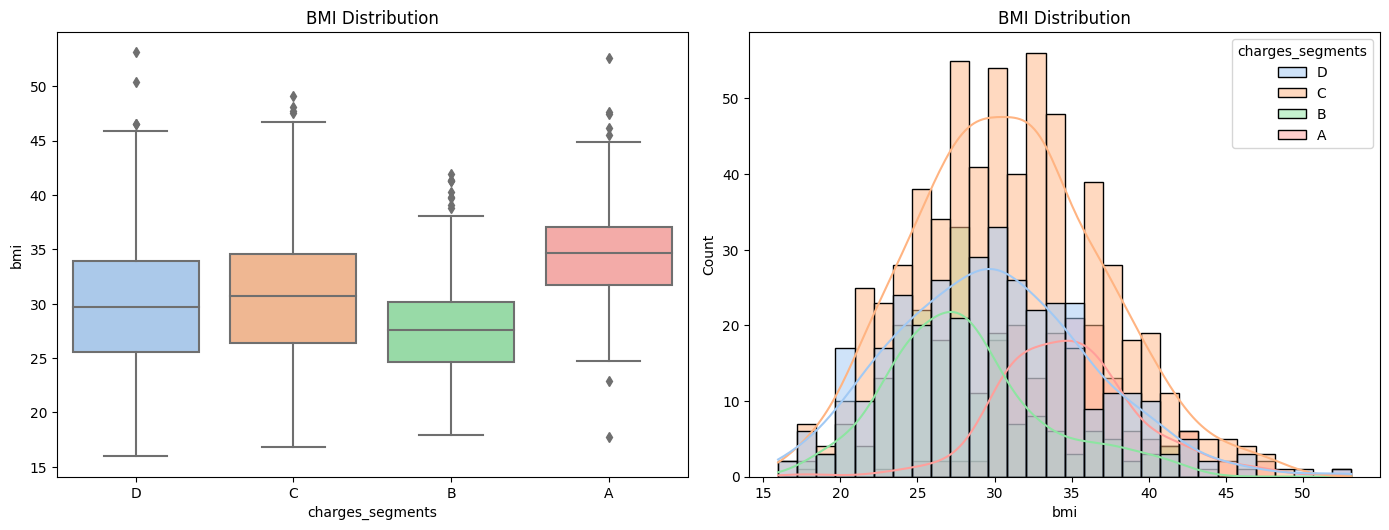

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.boxplot(x="charges_segments", y="bmi", data=df_insurance,palette="pastel")
plt.title(f"BMI Distribution")
plt.subplot(2,2,2)
sns.histplot(x="bmi", hue="charges_segments", data=df_insurance,bins=30,kde=True, palette="pastel")
plt.title(f"BMI Distribution")
plt.tight_layout()

In [ ]:
df_insurance.drop("charges_segments", axis = 1, inplace = True)

### Feature

In [ ]:
num_cols = [col for col in df_insurance.columns if (df_insurance[col].dtype in ["int64","float64"]) & (df_insurance[col].nunique()>50)]
cat_cols = [col for col in df_insurance.columns if df_insurance[col].nunique()<6]
cat_cols

['sex', 'smoker', 'region']

In [ ]:
df_insurance = pd.get_dummies(df_insurance,columns=cat_cols, drop_first=True, dtype="int")

### Model

#### Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, median_absolute_error

X = df_insurance.drop(["charges"], axis=1)
y = df_insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sb

In [ ]:
df_insurance.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,0.504862,0.204936,0.242334,0.272251,0.243082
std,14.044333,6.100468,1.205571,12110.359656,0.500163,0.403806,0.428655,0.445285,0.429104
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9386.161300,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
val=df_insurance.select_dtypes(include=['number'])

<Axes: >

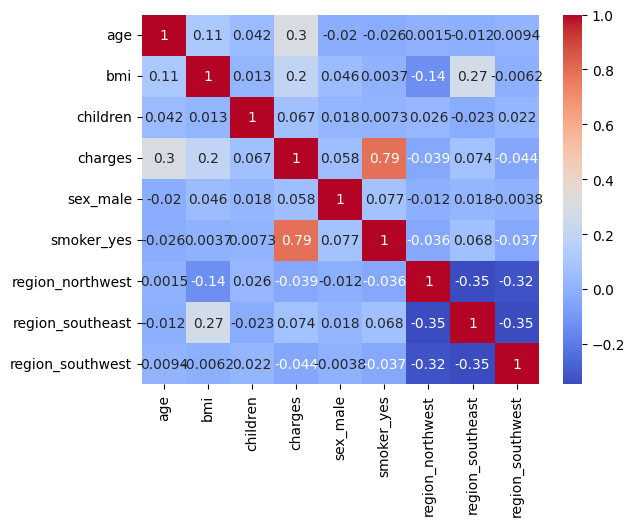

In [ ]:
sb.heatmap(val.corr(),annot=True,cmap='coolwarm')

#### Linear Regression

In [ ]:
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Absolute Error: 4177.045561036319
R-squared: 0.8069287081198011


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf=RandomForestRegressor()

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Absolute Error: 2656.423637657836
R-squared: 0.8795785787385128


#### Feature Importance

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 318
[LightGBM] [Info] Number of data points in the train set: 1069, number of used features: 8
[LightGBM] [Info] Start training from score 9290.139648
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


211.7334503187136

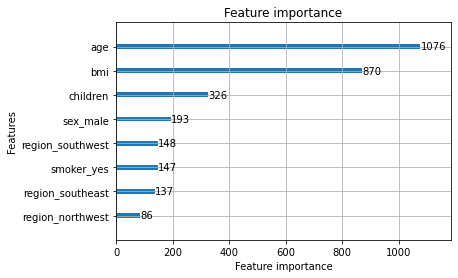

In [ ]:
import lightgbm
lgb = lightgbm.LGBMRegressor(objective = 'mae')
lgb.fit(X_train, y_train)
lightgbm.plot_importance(lgb);
median_absolute_error(y_test,lgb.predict(X_test))

368.4846031249981

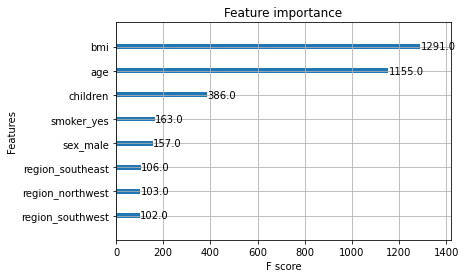

In [ ]:
import xgboost
xgb = xgboost.XGBRegressor(objective = 'reg:absoluteerror')
xgb.fit(X_train, y_train)
xgboost.plot_importance(xgb);
median_absolute_error(y_test,xgb.predict(X_test))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

lgb_importances = pd.DataFrame(dict(lgbm = lgb.feature_importances_), index=lgb.feature_name_)
xgb_importances = pd.DataFrame(dict(xgb = xgb.feature_importances_), index=xgb.feature_names_in_)
importances = pd.concat([lgb_importances,xgb_importances],axis=1)
min_max = MinMaxScaler((1,1.1))
importances["cross"] = min_max.fit_transform(importances[["lgbm"]]) * min_max.fit_transform(importances[["xgb"]])
sorted = importances.sort_values(by="cross", ascending=False)
